# 문제1. XOR 게이트 문제

문제 1-(1). 다음 표는 XOR 게이트의 진리표입니다.

입력값 x1, x2에 따라 y가 다음과 같이 나오도록 하는 "단층 퍼셉트론"의 가중치 (w1, w2)와 임계값(theta)으로 적합한 것은 무엇일까요? (10점)

(a) (0.5, 0.5, 0.2)

(b) (0.5, 0.5, 0.7)

(c) (1.0, 1.0, 1.0)

(d) 단층 퍼셉트론으로는 XOR 게이트를 구현할 수 없다.

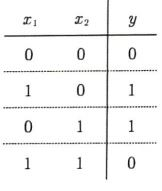

(힌트: 단층 퍼셉트론을 수식으로 표현하면 y=w1x1+w2x2 이며 이 값이 임계값보다 작거나 같으면 0, 크면 1을 출력합니다.)

정답: d

In [1]:
# 논리 회로 게이트 AND, NAND, OR을 정의하는 코드입니다. 실행해주세요.

import numpy as np

def AND(x1, x2):
  x = np.array([x1, x2])
  w = np.array([0.5, 0.5])
  b = -0.7
  tmp = np.sum(w*x) + b
  if tmp <= 0:
    return 0
  else:
    return 1

def NAND(x1, x2):
  x = np.array([x1, x2])
  w = np.array([-0.5, -0.5])
  b = 0.7
  tmp = np.sum(w*x) + b
  if tmp <= 0:
    return 0
  else:
    return 1

def OR(x1, x2):
  x = np.array([x1, x2])
  w = np.array([0.5, 0.5])
  b = -0.2
  tmp = np.sum(w*x) + b
  if tmp <= 0:
    return 0
  else:
    return 1

문제 1-(2). XOR 게이트 구현하기

다음은 AND, NAND, OR 게이트를 조합해 구현한 XOR 게이트입니다. 그림을 참고하여 XOR 게이트를 파이썬으로 구현해보세요. (10점)

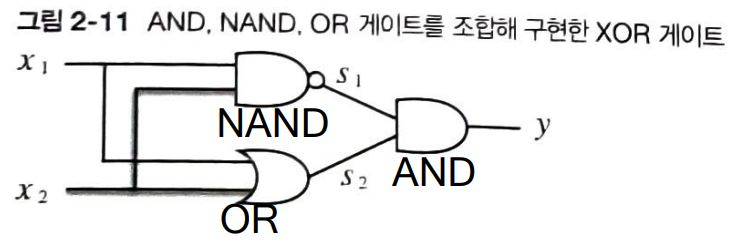

In [2]:
# '???'를 채워주세요.

# XOR 게이트 함수 생성
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [3]:
# 다음을 프린트하여 (0, 1, 1, 0)이 나오면 정답입니다.
XOR(0, 0), XOR(1, 0), XOR(0, 1), XOR(1, 1)

(0, 1, 1, 0)

# 문제 2. 경사하강법과 기울기 소실

In [4]:
# 수치미분을 이용해 기울기를 구하는 함수입니다. 실행해주세요.

def numerical_gradient(f, x):
  h = 1e-4
  # x와 형상이 같은 배열 생성
  grad = np.zeros_like(x)

  for idx in range(x.size):
    tmp_val = x[idx]

    x[idx] = tmp_val + h
    fxh1 = f(x)

    x[idx] = tmp_val - h
    fxh2 = f(x)

    grad[idx] = (fxh1-fxh2) / (2*h)
    x[idx] = tmp_val

  return grad

문제 2-(1). 아래 그림은 경사법을 수식으로 나타낸 것입니다.
수식을 참고하여 경사하강법을 통해 가중치를 갱신하는 코드를 완성하세요. (10점)

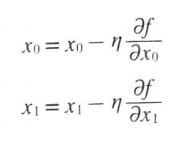

In [5]:
# '???'를 채워주세요!

#경사하강법 코드
def gradient_descent(f, init_x, lr=0.01, step_num=100):

    # 초깃값 설정
    x = init_x

    # step_num 만큼 반복하면서 기울기를 구하고 가중치 갱신
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x

문제 2-(2). 이번에는 경사법을 이용해 f(x0, x1) = x0^2+x1^2 이 최소가 되는 (x0, x1)을 구해봅시다. (10점)

f(x0, x1) = x0^2+x1^2은 3차원 공간 상에서 다음과 같이 생긴 함수입니다.


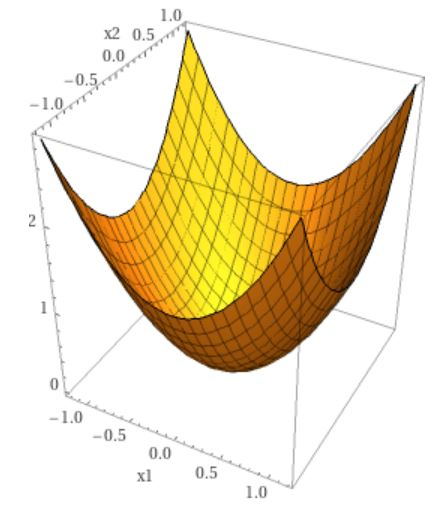

In [8]:
# '???'를 채워주세요.

# 함수 지정
def function(x):
    return x[0]**2 + x[1]**2

# 초깃값 설정
init_x = np.array([-3.0, 4.0])

# 위에서 정의한 gradient_descent 함수를 이용해 함숫값이 최소가 되는 x를 구해주세요.
# learning_rate은 0.1, step_num은 100으로 설정해주세요.
print(gradient_descent(function, init_x, lr=0.1, step_num=100))

[-6.11110793e-10  8.14814391e-10]


위의 그림에서 예상할 수 했듯이 (0, 0)이 나오는지 확인해보세요.

기울기 소실 문제(Vanishing gradient problem)는 역전파(Backpropagation) 방식을 통해 가중치를 업데이트 하는 과정에서 활성화 함수의 도함수가 초기 입력층으로 가면서 곱해질수록 기울기 값이 점점 작아지는 문제를 말합니다.

문제 2-(3). 다음 중 기울기 소실 문제를 가장 잘 보완한 활성화 함수를 고르세요. (10점)

(힌트: 함수의 기울기가 0이 되는 구간이 가장 작은 함수가 유리합니다!)

(a)

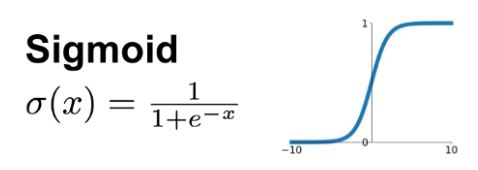

(b)

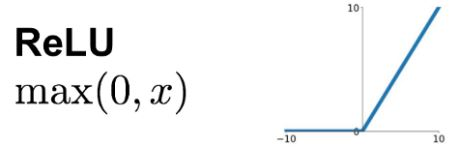

(c)

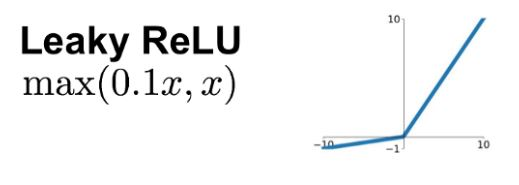

정답: c

# 문제 3.

In [ ]:
!pip install torchvision

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader

# 데이터셋 및 데이터 로더 설정
train_dataset = MNIST(root="./data", train=True, transform=transforms, download=True)
test_dataset = MNIST(root="./ data", train=False, transform=transforms, download=True)

# 데이터 전처리 및 정규화 (Compose를 사용하여 여러 변환을 적용)
transform = transforms.Compose([
    # [빈칸1] 랜덤한 가로 회전 (RandomRotation 사용, 30도)
    transforms.RandomRotation(30),
    # [빈칸2] 이미지를 텐서로 변환 (ToTensor 사용, 채널 수 1에서 3으로 변경)
    transforms.ToTensor(),
    # [빈칸3] 이미지 정규화 (평균과 표준편차 모두 0.5)
    transforms.Normalize((0.5,), (0.5,))
])

# [빈칸4] 데이터 로더 설정 (batch_size=64, shuffle train은 True, test는 False)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# 신경망 모델 정의
class BasicNN(nn.Module):
    def __init__(self):
        super(BasicNN, self).__init__()
        # [빈칸5] 첫 번째 Fully Connected Layer (입력 노드 수: 784, 출력 노드 수: 128)
        self.fc1 = nn.Linear(784, 128)
        # [빈칸5] 두 번째 Fully Connected Layer (출력 노드 수: 64)
        self.fc2 = nn.Linear(128, 64)
        # [빈칸5] 출력 노드 수를 클래스 수에 맞게 설정 (MNIST의 경우 10)
        self.fc3 = nn.Linear(64, 10)
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x) # [빈칸6] 첫 번째 Fully Connected Layer 적용
        x = nn.ReLU()(x) # [빈칸6] 활성화 함수 (ReLU) 적용
        x = self.fc2(x) # [빈칸6] 두 번째 Fully Connected Layer 적용
        x = nn.ReLU()(x) # [빈칸6] 활성화 함수 (ReLU) 적용
        x = self.fc3(x) # [빈칸6] 세 번째 Fully Connected Layer 적용
        x = nn.LogSoftmax(dim=1)(x) # [빈칸7] 출력 노드 수에 맞는 활성화 함수 적용 (LogSoftmax)

model = BasicNN()
criterion = nn.CrossEntropyLoss()
# [빈칸8] 옵티마이저로 SGD 사용 (학습률 0.01, 모멘텀 0.9로 지정)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# 훈련 및 평가 과정
epochs = 10
for epoch in range(epochs):
    model.train()
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

    model.eval()
    val_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            val_loss += criterion(output, target).item()
            # [빈칸9] 정확도 계산 (예측된 클래스와 실제 클래스 비교, argmax 이용)
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    val_loss /= len(test_loader.dataset)
    accuracy = correct / len(test_loader.dataset) * 100
    print(f"Epoch {epoch}, Validation Loss: {val_loss:.4f}, Accuracy: {accuracy:.2f}%")

# 테스트 데이터셋 설정 및 평가
test_loss = 0
correct = 0
model.eval()
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        test_loss += criterion(output, target).item()
        # [빈칸9] 정확도 계산 (예측된 클래스와 실제 클래스 비교, argmax 이용)
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

test_loss /= len(test_loader.dataset)
test_accuracy = correct / len(test_loader.dataset) * 100
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

100%|██████████| 9912422/9912422 [00:00<00:00, 104925843.35it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 28869326.46it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 28949381.31it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 12649753.50it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 9912422/9912422 [00:00<00:00, 91421000.51it/s]


Extracting ./ data/MNIST/raw/train-images-idx3-ubyte.gz to ./ data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 14573591.65it/s]


Extracting ./ data/MNIST/raw/train-labels-idx1-ubyte.gz to ./ data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 29547893.87it/s]


Extracting ./ data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./ data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 4347450.65it/s]

Extracting ./ data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./ data/MNIST/raw



TypeError: 'module' object is not callable

[빈칸 10] Test Loss와 Test Accuracy를 각각 기입하시오.

Test Loss:

Test Accuracy:

# 문제 4.

오차 역전파를 이용해 cosine 함수 구현하기 (50점)

-π부터 π까지의 cosine 함수를 구현하려고 합니다.

(1) YOURCODE_1 : input_data를 정규화 시키는 코드를 작성해주세요.

(2) YOURCODE_2 : 은닉층의 활성화 함수를 시그모이드 함수로 설정하는 코드를 작성해주세요.

(3) YOURCODE_3 : 은닉층의 가중치를 수정시키는 코드를 작성해주세요.

(4) YOURCODE_4 : 은닉층의 편향을 수정시키는 코드를 작성해주세요.

(5) YOURCODE_5 : 출력층의 가중치를 수정시키는 코드를 작성해주세요.

(6) YOURCODE_6 : 출력층의 편향을 수정시키는 코드를 작성해주세요.

(7) YOURCODE_7 : 오차제곱합을 계산하는 코드를 작성해주세요.

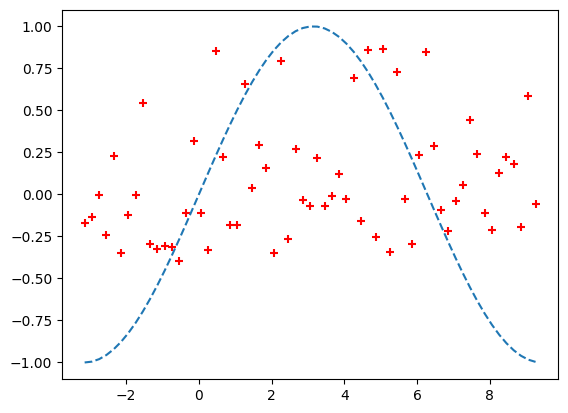

Epoch : 1 , Error :0.26777428065803527


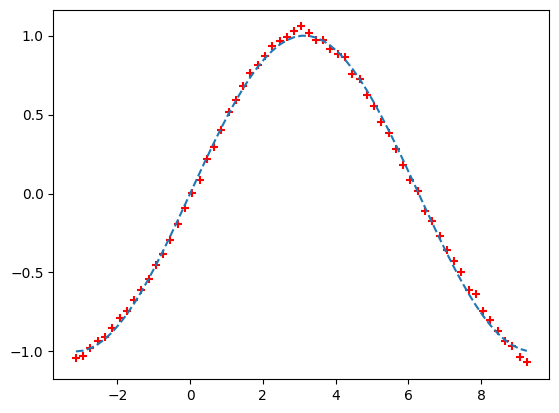

Epoch : 500 , Error :0.0004086901597238333


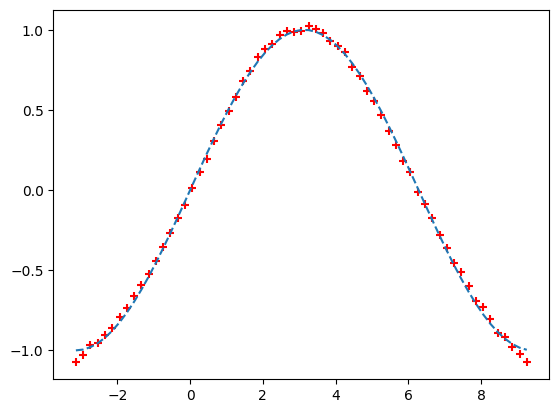

Epoch : 1000 , Error :0.0003104610837874813


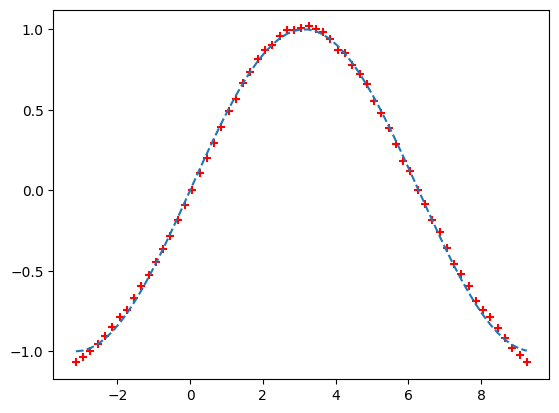

Epoch : 1500 , Error :0.0003047453610040378


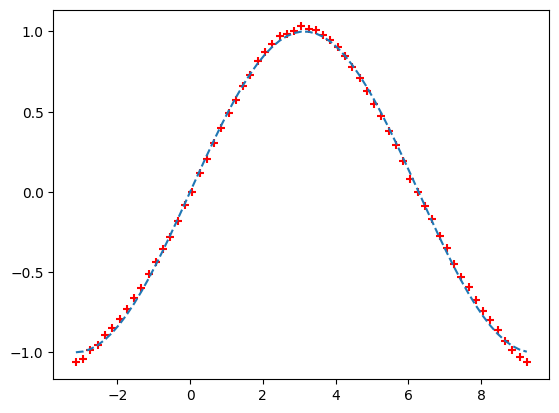

Epoch : 2000 , Error :0.0003051868443924868


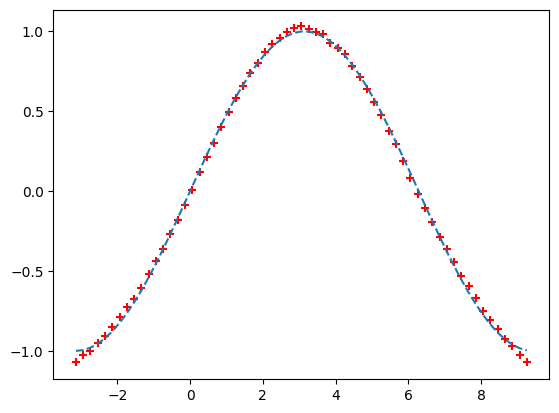

Epoch : 2500 , Error :0.0002832032031613642


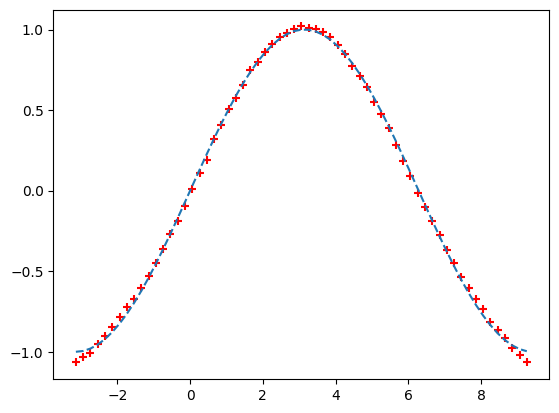

Epoch : 3000 , Error :0.00027358975626282713


In [14]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

#입력과 정답 준비
input_data = np.arange(-np.pi, np.pi, 0.1)  #입력
correct_data = np.cos(input_data)        #정답
input_data = (input_data + np.pi) / np.pi
n_data = len(correct_data)               #데이터 수

#각 설정 값
n_in = 1  #입력층의 뉴런 수
n_hid = 3 #은닉층의 뉴런 수
n_out = 1 #출력층의 뉴런 수

#wb_width = 1
eta = 0.1       #학습률
epoch = 3000
interval = 500  #경과 표시 간격

#은닉층
class HiddenLayer:
  def __init__(self, n_upper, n): #초기설정
    #가중치 행렬과 편향 벡터
    self.w = np.random.randn(n_upper, n)
    self.b = np.random.randn(n)

  def forward(self, x):           #순전파
    self.x = x
    u = np.dot(x, self.w) + self.b
    self.y = 1 / (1 + np.exp(-u))   #시그모이드 함수

  def backward(self, grad_y):     #역전파
    delta = grad_y * (1 - self.y)*self.y
    self.grad_w = np.dot(self.x.T, delta)
    self.grad_b = np.sum(delta, axis=0)
    self.grad_x = np.dot(delta, self.w.T)

  def update(self, eta):          #가중치와 편향 수정
    self.w -= eta * self.grad_w
    self.b -= eta * self.grad_b

#출력층
class OutputLayer:
  def __init__(self, n_upper, n):
    self.w = np.random.randn(n_upper, n)
    self.b = np.random.rand(n)

  def forward(self, x):   #순전파
    self.x = x
    u = np.dot(x, self.w) + self.b
    self.y = u

  def backward(self, t):  #역전파
    delta = self.y - t
    self.grad_w = np.dot(self.x.T, delta)
    self.grad_b = np.sum(delta, axis=0)
    self.grad_x = np.dot(delta, self.w.T)

  def update(self, eta):  #가중치와 편향 수정
    self.w -= eta * self.grad_w
    self.b -= eta * self.grad_b

#각 층의 초기화
hidden_layer = HiddenLayer(n_in, n_hid)
output_layer = OutputLayer(n_hid, n_out)

#학습
for i in range(epoch):

  #인덱스 임의로 섞기
  index_random = np.arange(n_data)
  np.random.shuffle(index_random)

  #결과표시
  total_error = 0
  plot_x = []
  plot_y = []

  for idx in index_random:

    x = input_data[idx:idx+1]   #입력
    t = correct_data[idx:idx+1] #출력

    #순전파
    hidden_layer.forward(x.reshape(1,1))  #입력을 행렬로 변환
    output_layer.forward(hidden_layer.y)

    #역전파
    output_layer.backward(t.reshape(-1,1))  #정답을 행렬로 변환
    hidden_layer.backward(output_layer.grad_x)

    #가중치와 편향 수정
    hidden_layer.update(eta)
    output_layer.update(eta)

    if i==0 or (i+1)%interval ==0:

      y = output_layer.y.reshape(-1)  #행렬을 벡터로 되돌림

      #오차제곱합 계산
      total_error += 0.5 * np.sum((y - t) ** 2)

      #출력기록
      plot_x.append(x)
      plot_y.append(y)

  if i==0 or (i+1)%interval == 0:

    #출력 그래프 표시
    plt.plot(input_data*2*np.pi - np.pi, correct_data, linestyle = 'dashed')
    plt.scatter(np.array(plot_x) *2* np.pi - np.pi, plot_y, marker = '+', color='red')
    plt.show()

    #에포크 수와 오차 표시
    print('Epoch :', i+1,',','Error :' + str(total_error/n_data))